In [3]:
pip install pmdarim

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement pmdarim (from versions: none)
ERROR: No matching distribution found for pmdarim
You should consider upgrading via the 'C:\Python3\python.exe -m pip install --upgrade pip' command.


In [4]:
pip install sympy

     ---------------------------------------- 6.4/6.4 MB 4.7 MB/s eta 0:00:00
     -------------------------------------- 532.6/532.6 KB 3.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Python3\python.exe -m pip install --upgrade pip' command.


In [5]:
import pandas as pd
import numpy as np
import pmdarima as pm
from pmdarima.arima import auto_arima
from pmdarima.arima import ADFTest
import matplotlib.pyplot as plt
from matplotlib import pyplot
from math import sqrt
from numpy import split
from numpy import array
import statsmodels
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sympy.solvers import solve
from sympy import Symbol

In [ ]:
#import data

In [16]:
usdaGlobal= pd.read_csv("C:/Users/srjoh/OneDrive/Documents/WOZ-U/Final Project/datasets/pivotedGlobal.csv")

usdaGlobal.head()

,Unnamed: 0,Year,"Almonds, Shelled Basis","Apples, Fresh",Barley,"Coffee, Green",Corn,"Dairy, Milk, Fluid","Grapefruit, Fresh","Meat, Swine",Oats,"Oil, Soybean","Oilseed, Rapeseed",Rye,"Walnuts, Inshell Basis"
0,0,1998,235884.0,5282724.0,235884000.0,1.415304e+07,4.822010e+09,326151000.0,185000.0,4.740312e+12,247882000.0,4.176508e+09,5214000.0,2114000.0,205931.0
1,1,1999,377800.0,5746060.0,361362000.0,2.168172e+07,4.800686e+09,77534000.0,183000.0,4.476775e+12,239549000.0,3.797778e+09,662250000.0,2165000.0,256734.0
2,2,2000,318900.0,5675890.0,303700000.0,1.822200e+07,4.274204e+09,332092000.0,163000.0,2.395490e+11,251854000.0,3.946939e+09,307386000.0,1707000.0,216816.0
3,3,2001,376500.0,5065060.0,376488000.0,2.258928e+07,3.866379e+09,305319000.0,163000.0,2.518540e+11,241377000.0,4.354875e+09,312180000.0,1684000.0,276700.0
4,4,2002,494416.0,4605810.0,494416000.0,2.686065e+11,3.988483e+09,83581000.0,186000.0,3.871860e+11,227767000.0,4.433333e+09,332092000.0,2096000.0,255825.0


In [8]:
#isolate coffee

In [17]:
justcoffee = usdaGlobal[['Year', 'Coffee, Green']]
justcoffee

,Year,"Coffee, Green"
0,1998,1.415304e+07
1,1999,2.168172e+07
2,2000,1.822200e+07
3,2001,2.258928e+07
4,2002,2.686065e+11
5,2003,2.775984e+10
6,2004,2.323116e+10
7,2005,2.168172e+10
8,2006,3.169634e+11
9,2007,2.880412e+11


In [18]:
# Formatting Year to date datatype 
justcoffee['Year'] = pd.to_datetime(justcoffee['Year'], format='%Y')

C:\Users\srjoh\AppData\Local\Temp\ipykernel_14952\3996155917.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  justcoffee['Year'] = pd.to_datetime(justcoffee['Year'], format='%Y')


In [19]:
## Setting Year as index
justcoffee.set_index('Year', inplace=True)
type(justcoffee)

pandas.core.frame.DataFrame

<AxesSubplot:xlabel='Year'>

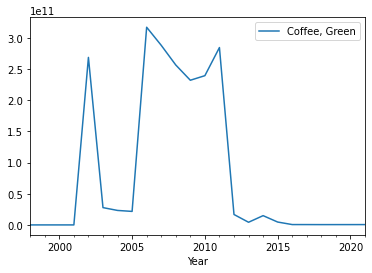

In [20]:
## Looking at linear plot of coffee production
justcoffee.plot()

In [21]:
#coffee is fluctuating significantly

In [22]:
## Testing our finding against Augmented Dickey Fuller test
result=adfuller(justcoffee['Coffee, Green'], autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'n_lags: {result[1]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

ADF Statistic: -1.385182943405054
n_lags: 0.5893586280140275
p-value: 0.5893586280140275
Critial Values:
   1%, -4.01203360058309
Critial Values:
   5%, -3.1041838775510207
Critial Values:
   10%, -2.6909873469387753


In [23]:
#ADF Statistic is higher than all critical values - non-stationary 

In [24]:
#divide data for testing

In [25]:
train = justcoffee[:20]
test = justcoffee[-4:]
train
test

,"Coffee, Green"
Year,
2018-01-01,501300000.0
2019-01-01,514320000.0
2020-01-01,526860000.0
2021-01-01,549300000.0


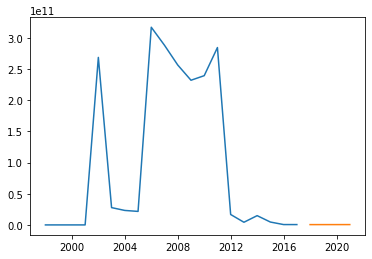

In [26]:
plt.plot(train)
plt.plot(test)

In [ ]:
## Run auto_arima for p, d, q variables

In [28]:
model = pm.auto_arima(justcoffee['Coffee, Green'], seasonal=False)
model

ARIMA(order=(1, 0, 0), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [29]:
# p=1, d=0, q=0 

In [44]:
# Build Auto ARIMA model
arima_model =  auto_arima(train,start_p=1, d=0, start_q=0, 
                          max_p=5, max_d=5, max_q=5, start_P=1, 
                          D=0, start_Q=0, max_P=5, max_D=5,
                          max_Q=5, m=12, seasonal=True, 
                          error_action='warn',trace = True,
                          supress_warnings=True,stepwise = True,
                          random_state=20,n_fits = 50 )

Performing stepwise search to minimize aic
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=1081.030, Time=0.04 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=1083.019, Time=0.03 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=1082.962, Time=0.12 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=1090.837, Time=0.00 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=1079.056, Time=0.01 sec
 ARIMA(1,0,0)(0,0,1)[12] intercept   : AIC=1081.055, Time=0.05 sec
 ARIMA(1,0,0)(1,0,1)[12] intercept   : AIC=1083.006, Time=0.07 sec
 ARIMA(2,0,0)(0,0,0)[12] intercept   : AIC=1081.140, Time=0.01 sec
 ARIMA(1,0,1)(0,0,0)[12] intercept   : AIC=1081.390, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : AIC=1080.965, Time=0.02 sec
 ARIMA(2,0,1)(0,0,0)[12] intercept   : AIC=1083.015, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[12]             : AIC=1079.214, Time=0.02 sec

Best model:  ARIMA(1,0,0)(0,0,0)[12] intercept
Total fit time: 0.435 seconds


In [ ]:
# Best model confirmed p=1 d=0 q=0, our ARIMA class is I(1)

In [31]:
# ARIMA model summary

In [45]:
arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   20
Model:               SARIMAX(1, 0, 0)   Log Likelihood                -536.528
Date:                Wed, 20 Jul 2022   AIC                           1079.056
Time:                        11:22:27   BIC                           1082.043
Sample:                             0   HQIC                          1079.639
                                 - 20                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   5.072e+10   5.83e-13    8.7e+22      0.000    5.07e+10    5.07e+10
ar.L1          0.4850      0.142      3.405      0.001       0.206       0.764
sigma2      1.174e+22   1.23e-24   9.53e+45      0.000    1.17e+22    1.17e+22
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 2.27
Prob(Q):                              0.91   Prob(JB):                         0.32
Heteroskedasticity (H):               0.64   Skew:                             0.82
Prob(H) (two-sided):                  0.57   Kurtosis:                         3.17
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.33e+62. Standard errors may be unstable.
"""

In [33]:
# forecast on test data

In [46]:
prediction = pd.DataFrame(arima_model.predict(n_periods = 4),index=test.index)
prediction.columns = ['predicted_values']
prediction

,predicted_values
Year,
2018-01-01,5.099597e+10
2019-01-01,7.545991e+10
2020-01-01,8.732583e+10
2021-01-01,9.308124e+10


In [35]:
# Plot against actual values

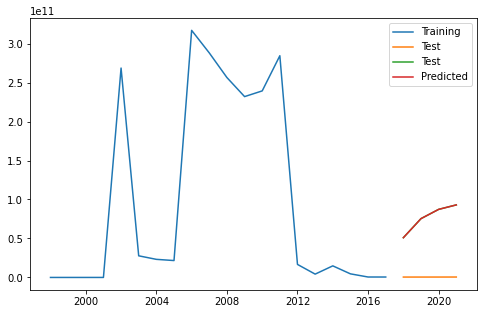

In [47]:
plt.figure(figsize=(8,5))
plt.plot(train,label="Training")
plt.plot(test,label="Test")
plt.plot(prediction,label="Predicted")
plt.legend(loc = 'best')
plt.show()

In [37]:
# R2 Score

In [48]:
test['predicted_values'] = prediction
r2_score(test['Coffee, Green'], test['predicted_values'])

C:\Users\srjoh\AppData\Local\Temp\ipykernel_14952\640439434.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['predicted_values'] = prediction


-19366684.757207304

In [49]:
# R2 is extremely high, but for the sake of the analysis, moving forward anyway

In [50]:
# residual plots

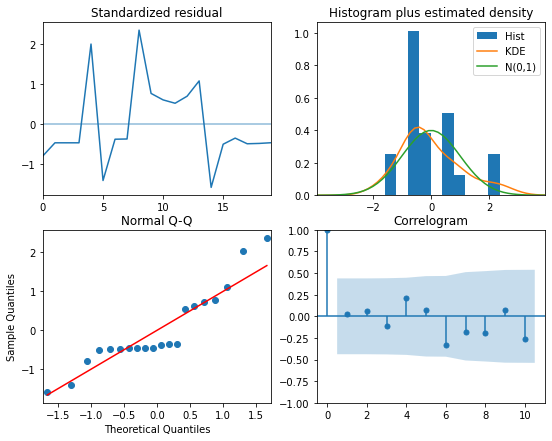

In [51]:
arima_model.plot_diagnostics(figsize=(9,7))
plt.show()

In [52]:
# upper left mean is centered at 0, and the variance looks consistent
# upper right shows very similar distributions, but KDE line is slightly skewed to the left
# bottom left follows the line generally but there is a chunk of data points that are much flatter than the q-q line
# bottom right has what appears to be a single outlier, but otherwise mostly consistent 
# Fit has a few question marks, but will go with it

In [ ]:
# create new dataset for future predictions

In [53]:
future = {'Year':  [2022, 2023, 2024, 2025],
        'predicted_values': ['NaN', 'NaN', 'NaN', 'NaN']}

future = pd.DataFrame(future)
print (future)

   Year predicted_values
0  2022              NaN
1  2023              NaN
2  2024              NaN
3  2025              NaN


In [54]:
#reformat year to date

In [55]:
future['Year'] = pd.to_datetime(future['Year'], format='%Y')

In [56]:
#index by year

In [57]:
future.set_index('Year', inplace=True)
type(future)
future

,predicted_values
Year,
2022-01-01,NaN
2023-01-01,NaN
2024-01-01,NaN
2025-01-01,NaN


In [58]:
# append

In [59]:
futureprediction = justcoffee.append(future)
futureprediction

C:\Users\srjoh\AppData\Local\Temp\ipykernel_14952\1720967587.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  futureprediction = justcoffee.append(future)


,"Coffee, Green",predicted_values
Year,,
1998-01-01,1.415304e+07,NaN
1999-01-01,2.168172e+07,NaN
2000-01-01,1.822200e+07,NaN
2001-01-01,2.258928e+07,NaN
2002-01-01,2.686065e+11,NaN
2003-01-01,2.775984e+10,NaN
2004-01-01,2.323116e+10,NaN
2005-01-01,2.168172e+10,NaN
2006-01-01,3.169634e+11,NaN


In [ ]:
# establish number of points for forecast

In [60]:
h=28

In [61]:
# Generate forecast

In [62]:
forecast2 = pd.DataFrame(arima_model.predict(h), index=futureprediction.index)
forecast2.columns = ['predicted_values']
forecast2

,predicted_values
Year,
1998-01-01,5.099597e+10
1999-01-01,7.545991e+10
2000-01-01,8.732583e+10
2001-01-01,9.308124e+10
2002-01-01,9.587283e+10
2003-01-01,9.722686e+10
2004-01-01,9.788361e+10
2005-01-01,9.820216e+10
2006-01-01,9.835667e+10


In [63]:
#visualize forecast with training data

In [64]:
time = np.arange(train.shape[0] + h)

In [65]:
#show division of data - training data = black, prediction data = red

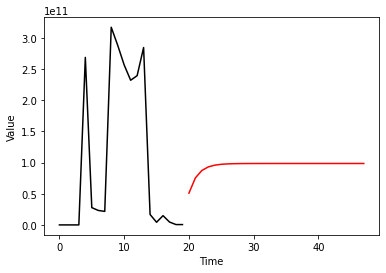

In [67]:
plt.plot(time[:train.shape[0]], train, c = 'black')
plt.plot(time[train.shape[0]:], forecast2, c = 'red')
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()

In [ ]:
# 2023 predicted Honey values based on Coffee Commodity Forecasting, 
# Using Coffee/ Honey linear regression equation performed in usdaHoneyMisc1: y = 1051(Honey) + 166000.9553
# Coffee production for 2023 is forecasted at 9.850220e+10, or 9,850,220,000 Metric Tons
# 9850220000 = 1051(Honey) + 166000.9553

In [69]:
9850220000 -166000.9553

9850053999.0447

In [70]:
9850053999.0447/1051

9372078.020023502

In [ ]:
# ARIMA coffee forecasting and equation showing linear relationship between US coffee and honey production
# Results indicate that honey production is forecasted to be 9372078 Metric Tons in 2023